In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
house_df = pd.read_excel(r"D:\Data Analysis_Bootcamp\Full_Projects_Datasets\MO-CHEN-Portfolio_prejects\A TABLEAU PORTFOLIO PROJECT to showcase ADVANCED visualization skills\HouseData.xlsx")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,20140911T000000,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215


In [142]:
house_df['date'] = house_df['date'].str.replace("T000000", "")
house_df['date'] = pd.to_datetime(house_df['date'])

In [143]:
house_df['year'] = house_df['date'].dt.year
print(house_df['year'])

0        2014
1        2014
2        2015
3        2015
4        2014
         ... 
21055    2014
21056    2015
21057    2014
21058    2014
21059    2015
Name: year, Length: 21060, dtype: int32


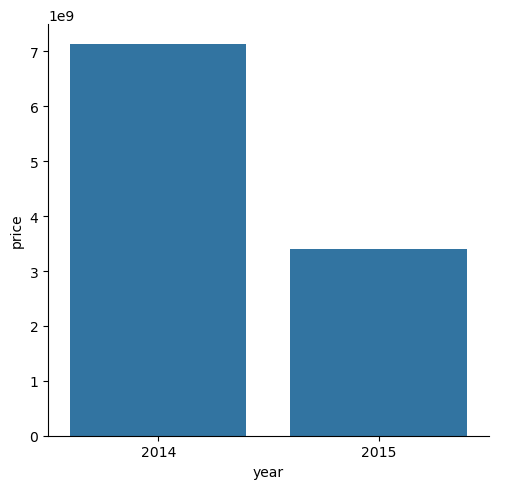

In [144]:
yearly_price = house_df.groupby("year")[['price']].sum()
yearly_price

sns.catplot(kind='bar', x='year', y='price', data=yearly_price)
plt.show()

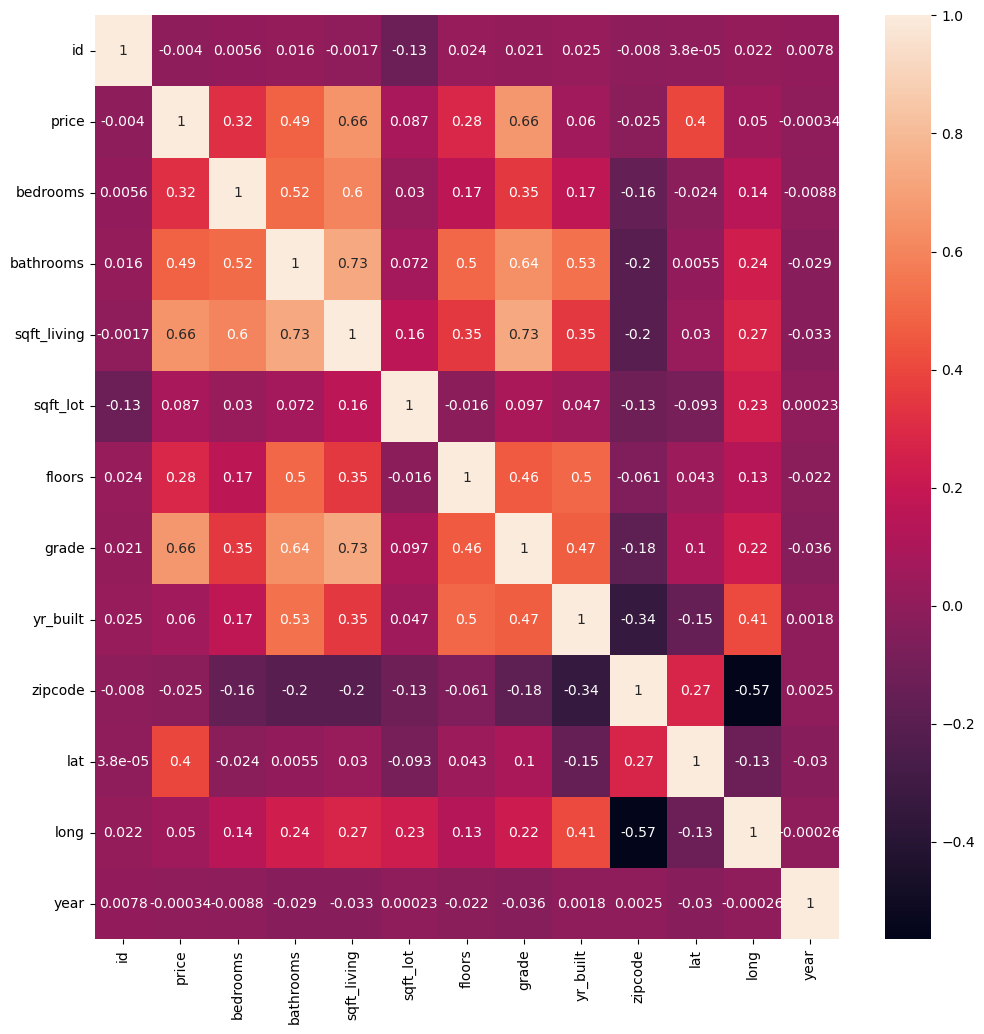

In [145]:
correlation_matrix = house_df.corr(numeric_only = True)
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix , annot = True)
plt.show()

In [146]:
house_df['condition'] = house_df['condition'].astype("category")
condition_order = ['Poor- Worn out', 'Fair- Badly worn', 'Average', 'Good', 'Very Good']
house_df['condition'] = house_df['condition'].cat.reorder_categories(condition_order, ordered=True)
house_df['condition'].unique()

['Average', 'Very Good', 'Good', 'Fair- Badly worn', 'Poor- Worn out']
Categories (5, object): ['Poor- Worn out' < 'Fair- Badly worn' < 'Average' < 'Good' < 'Very Good']

In [147]:
house_df['grade'] = house_df['grade'].astype("category")
house_df['grade'].unique()

[10, 9, 12, 11, 8, ..., 6, 5, 4, 3, 1]
Length: 11
Categories (11, int64): [1, 3, 4, 5, ..., 9, 10, 11, 12]

In [148]:
# Filter data from 2014
house_df_2014 = house_df[house_df['date'].dt.year == 2014].copy()

house_df_2014

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,year
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198,2014
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287,2014
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215,2014
5,8835770170,2014-08-22,1488000,5,6.00,6880,279968,2.0,No,Good,Average,12,2007,98045,47.4624,-121.779,2014
6,4139500080,2014-07-18,1488000,4,4.25,5180,13077,2.0,No,Good,Average,12,1998,98006,47.5513,-122.109,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,7999600180,2014-05-29,83000,2,1.00,900,8580,1.0,No,No View,Average,5,1918,98168,47.4727,-122.270,2014
21054,1623049041,2014-05-08,82500,2,1.00,520,22334,1.0,No,No View,Fair- Badly worn,5,1951,98168,47.4799,-122.296,2014
21055,3883800011,2014-11-05,82000,3,1.00,860,10426,1.0,No,No View,Average,6,1954,98146,47.4987,-122.341,2014
21057,8658300340,2014-05-23,80000,1,0.75,430,5050,1.0,No,No View,Fair- Badly worn,4,1912,98014,47.6499,-121.909,2014


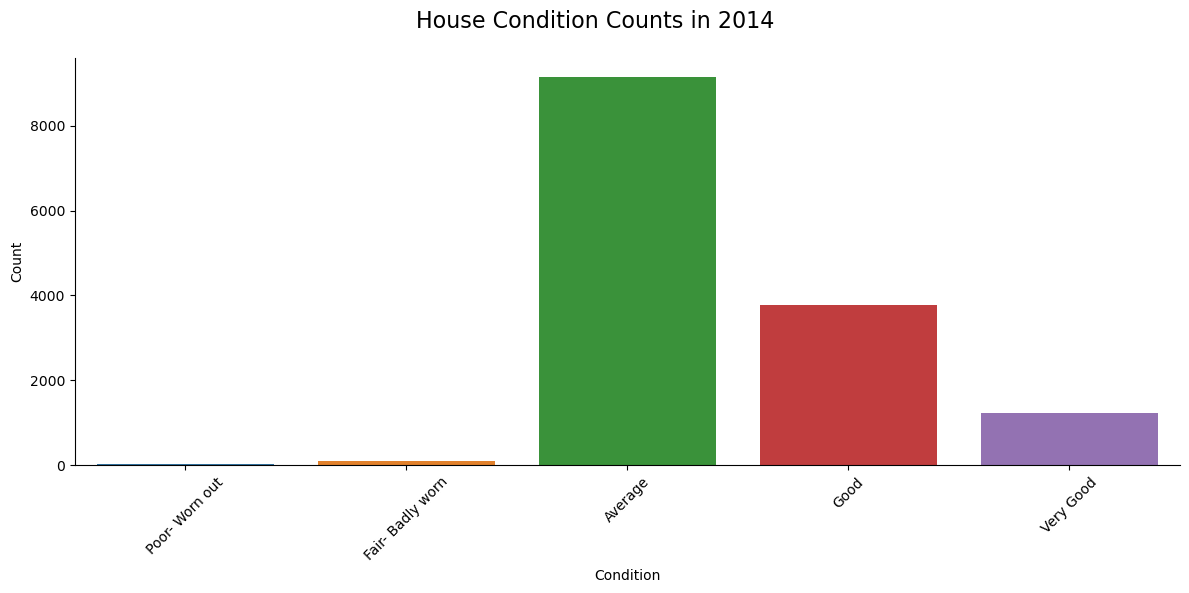

In [149]:
# Create the catplot and set figure size directly
f = sns.catplot(
    kind='count',
    x='condition',
    data=house_df_2014,
    hue='condition',
    height=6,
    aspect=2 
)

# Set title and labels
f.fig.suptitle("House Condition Counts in 2014", fontsize=16)
f.set_axis_labels("Condition", "Count")

# Rotate x-axis labels to avoid overlap
f.set_xticklabels(rotation=45)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # prevent title from overlapping with the plot

plt.show()

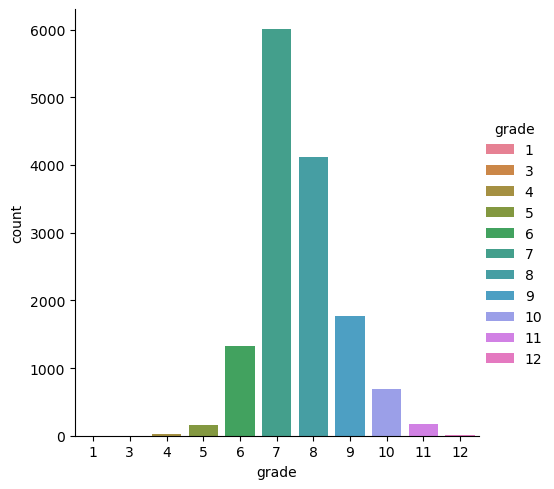

In [150]:
grade_2014 = sns.catplot(kind='count', x='grade', data=house_df_2014, hue='grade')
plt.show()

In [151]:
house_df_2015 = house_df[house_df['date'].dt.year == 2015].copy()
house_df_2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,year
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227,2015
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228,2015
9,8835401250,2015-05-06,1485000,6,2.75,4430,6440,2.0,No,Good,Average,10,1964,98118,47.5462,-122.265,2015
12,4217401035,2015-05-07,1482500,3,2.25,3290,5000,2.0,No,No View,Average,9,1939,98105,47.6582,-122.280,2015
18,4139910180,2015-01-14,1475000,5,4.00,4770,31570,2.0,No,No View,Average,12,1990,98006,47.5468,-122.123,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21047,1721801591,2015-02-19,89950,1,1.00,570,4080,1.0,No,No View,Average,5,1942,98146,47.5098,-122.334,2015
21050,1322049150,2015-03-05,85000,2,1.00,910,9753,1.0,No,No View,Average,5,1947,98032,47.3897,-122.236,2015
21052,1523049188,2015-04-30,84000,2,1.00,700,20130,1.0,No,No View,Average,6,1949,98168,47.4752,-122.271,2015
21056,3028200080,2015-03-24,81000,2,1.00,730,9975,1.0,No,No View,Poor- Worn out,5,1943,98168,47.4808,-122.315,2015


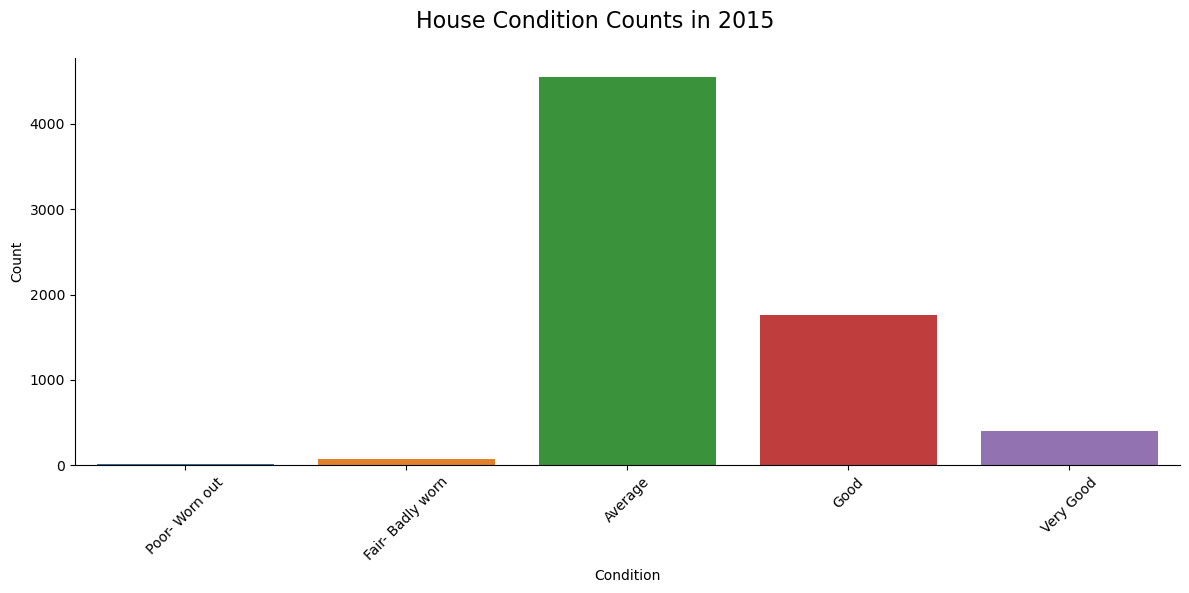

In [152]:
# Create the catplot and set figure size directly
g = sns.catplot(
    kind='count',
    x='condition',
    data=house_df_2015,
    hue='condition',
    height=6,
    aspect=2 
)

# Set title and labels
g.fig.suptitle("House Condition Counts in 2015", fontsize=16)
g.set_axis_labels("Condition", "Count")

# Rotate x-axis labels to avoid overlap
g.set_xticklabels(rotation=45)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # prevent title from overlapping with the plot

plt.show()

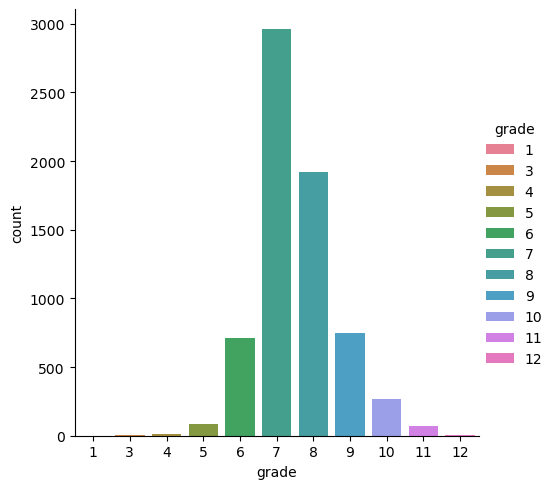

In [154]:
grade_2015 = sns.catplot(kind='count', x='grade', data=house_df_2015, hue='grade')
plt.show()